# Exploring Metadata Keyword Relationships with word2vec

This notebook demonstrates using a pretrained word2vec model to explore how keywords are related to other words and other keywords. 

Examples of how to use pretrained models and code where used from https://github.com/3Top/word2vec-api


This notebook runs on the docker jupyter/datascience-notebook container with gensim additionally installed as below 

In [54]:
%matplotlib notebook

In [50]:
%%bash
pip install gensim

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
from gensim.models.word2vec import Word2Vec as w
import gensim.models
from gensim import utils, matutils

## Loading a pretrained word2vec model

This model has been sourced http://nlp.stanford.edu/data/glove.6B.zip to use this you'll need to download it as it's too big to package alongside this notebook.

To load it sucessfully it has been modified to add a '400000 300' (presumably specifying the number of words and vector size) to a new line above the rest of the data

In [6]:
%%bash 
head -2 ./glove.6B.300d.txt

400000 300 
the 0.04656 0.21318 -0.0074364 -0.45854 -0.035639 0.23643 -0.28836 0.21521 -0.13486 -1.6413 -0.26091 0.032434 0.056621 -0.043296 -0.021672 0.22476 -0.075129 -0.067018 -0.14247 0.038825 -0.18951 0.29977 0.39305 0.17887 -0.17343 -0.21178 0.23617 -0.063681 -0.42318 -0.11661 0.093754 0.17296 -0.33073 0.49112 -0.68995 -0.092462 0.24742 -0.17991 0.097908 0.083118 0.15299 -0.27276 -0.038934 0.54453 0.53737 0.29105 -0.0073514 0.04788 -0.4076 -0.026759 0.17919 0.010977 -0.10963 -0.26395 0.07399 0.26236 -0.1508 0.34623 0.25758 0.11971 -0.037135 -0.071593 0.43898 -0.040764 0.016425 -0.4464 0.17197 0.046246 0.058639 0.041499 0.53948 0.52495 0.11361 -0.048315 -0.36385 0.18704 0.092761 -0.11129 -0.42085 0.13992 -0.39338 -0.067945 0.12188 0.16707 0.075169 -0.015529 -0.19499 0.19638 0.053194 0.2517 -0.34845 -0.10638 -0.34692 -0.19024 -0.2004 0.12154 -0.29208 0.023353 -0.11618 -0.35768 0.062304 0.35884 0.02906 0.0073005 0.0049482 -0.15048 -0.12313 0.19337 0.12173 0.44503 0.25147 0.10781 -0.

In [7]:
model = gensim.models.KeyedVectors.load_word2vec_format('./glove.6B.300d.txt', binary=False)

## Keywords describing datasets

A keywords.json file was produced from backend data harvested as part of populating the knowledge network http://kn.csiro.au

In [10]:
import json

In [11]:
with open('./keywords.json') as keywords_json_file:
    raw_keywords = json.load(keywords_json_file)

In [12]:
keywords_dict = [keyword for keyword in raw_keywords if 'keywords' in keyword.keys() and keyword['keywords'] != None]

In [13]:
for anItem in keywords_dict[0:10]:
    print(anItem)

{'keywords': ['entomology', 'insects', 'spiders', 'fauna'], '_id': '59159e9b3dd97b0a4c165378'}
{'keywords': ['plants'], '_id': '59159e9b3dd97b0a4c165379'}
{'keywords': ['microbial'], '_id': '59159e9b3dd97b0a4c16537b'}
{'keywords': ['plants'], '_id': '59159e9b3dd97b0a4c16537e'}
{'keywords': ['herbarium', 'herbaria', 'angiosperms', 'dicots', 'monocots', 'pteridophytes', 'mosses', 'liverworts', 'lichens', 'fungi', 'algae', 'plants'], '_id': '59159e9b3dd97b0a4c16537f'}
{'keywords': ['microbial'], '_id': '59159e9b3dd97b0a4c165380'}
{'keywords': ['microbial'], '_id': '59159e9b3dd97b0a4c165381'}
{'keywords': ['microbes'], '_id': '59159e9b3dd97b0a4c165382'}
{'keywords': ['arachnids', 'spiders', 'myriapods', 'centipedes', 'millipedes', 'onychophorans', '"velvet', 'worms"', 'tardigrades', '"water', 'bears"', 'fauna'], '_id': '59159e9b3dd97b0a4c165383'}
{'keywords': ['entomology', 'insects', 'hexapoda'], '_id': '59159e9b3dd97b0a4c165384'}


## Keyword cleaning and considerations

Keywords are flattened to a unique list. However there are a lot of keywords that aren't single words. These aren't handled currently. 

In [14]:
flat_keywords = [keyword for keyword_item in keywords_dict for keyword in keyword_item['keywords']]

In [15]:
unique_keywords = list(set(flat_keywords))

In [16]:
len(unique_keywords)

1912

## Finding similar words

Here we find the top 10 words similar to a keyword. Note that this isn't finding the most similar other keywords rather it is finding words from the original word to vec corpus (in this case wikipedia + gigawords), only a small number of which are exisiting keywords. Also note that not all keywords are in the corpus if a keyword isn't present an error is thrown.

In [17]:
for keyword in unique_keywords[1:10]:
    print(keyword)
    try:
        print(str(model.most_similar_cosmul(positive=keyword,topn=10)) + "\n")
    except:
        print("Word not in corpus" + "\n")
        continue

scale up
Word not in corpus

geology
[('mineralogy', 0.8367956280708313), ('geography', 0.8337733149528503), ('zoology', 0.8233452439308167), ('archaeology', 0.8034197688102722), ('paleontology', 0.8027987480163574), ('botany', 0.8016353845596313), ('hydrology', 0.7939602136611938), ('geological', 0.791845977306366), ('anthropology', 0.7906234264373779), ('astronomy', 0.7892726063728333)]

sensor network
Word not in corpus

ferret
[('ferrets', 0.7464505434036255), ('black-footed', 0.7138614058494568), ('legging', 0.7058811783790588), ('ferreting', 0.6807850003242493), ('rhino', 0.6746401190757751), ('rummage', 0.6691969037055969), ('unicorn', 0.6686753630638123), ('retriever', 0.6658296585083008), ('thieving', 0.6648372411727905), ('canine', 0.6626259088516235)]

Queensland plateau
Word not in corpus

nanodiamond, bucky-diamond, nanoparticle, DFTB
Word not in corpus

xml
[('html', 0.8442864418029785), ('metadata', 0.8166780471801758), ('schema', 0.8088633418083191), ('json', 0.80326908

## Finding only similar existing keywords

In some use cases we might want to only want to find existing keywords similar to other keywords. This might help a user select a new keyword based on other similar keywords to an already selected keyword. The best way to do this might be to reset the word2vec model to use the keywords as a corpus and then "copy" the weights from an existing model (because we can't easily train specifically on the small keyword corpus). An alternative is to "brute force" this by build ordered dictionaries so that each keyword is associated with an list of all other keywords ordered by similarity. Not implemented yet but might begin like the following

In [74]:
print('sea' + '\n')
for keyword in unique_keywords[1:30]:
    try:
        print(keyword + ': ' + str(model.similarity(keyword, 'sea')))
    except:
        pass

sea

geology: 0.139573634562
ferret: -0.0238875666946
xml: -0.0957878384006
estuaries: 0.245522246545
morphology: 0.0232775121389
sucrose: -0.0344297328679
boreholes: 0.067932360096
paramyxovirus: -0.023766387888
plant: 0.217182461065
scheduling: -0.0496188408048


## What else might we be able to do with word2vec vectors and keywords

One thing that might be possible is to look at how closely related a particular set of keywords attributed to a dataset  actually are. We can compare word vector distance ourselves and so can calculate average distance of keywords with each other. 

In [24]:
model.word_vec(unique_keywords[2])

array([ 0.058762  ,  0.13462999, -0.11947   ,  0.14343999, -0.24157999,
       -0.14150999,  0.024601  , -0.58157003,  0.46832001, -0.73117   ,
        0.15012001, -0.07883   ,  0.35431999,  0.37818   ,  0.58601999,
       -0.44843   ,  0.31343001,  0.20029999,  0.41152999,  0.57174999,
       -0.29811001,  0.51723999, -0.2599    ,  0.64245999, -0.72254002,
        0.13867   ,  0.31033   ,  0.41404   , -0.29218   , -0.41016001,
        1.24370003,  0.18877999, -0.32401001,  0.27671999,  0.64732999,
       -0.070629  ,  0.065632  ,  0.046316  ,  0.13738   ,  0.059934  ,
        0.13399   , -0.30000001,  0.72415   ,  0.037312  ,  0.13739   ,
       -0.3053    ,  0.027806  ,  0.29080999, -0.31806999, -0.45738   ,
       -0.055785  , -0.18021999, -0.30146   ,  0.35597   ,  0.26813999,
        0.71649998,  0.46777001, -0.58230001, -0.096738  , -0.13798   ,
        0.10548   ,  1.03699994,  0.56551999,  0.27704   , -0.40588999,
       -0.20735   ,  0.17189001, -0.11872   , -0.48289999, -0.35

In [25]:
import numpy, itertools, collections

average_keyword_dist_record = {}

def get_word_vec(word, word_vec):
    a_vec = None
    if word in word_vec.keys():
        a_vec = word_vec[word]
    else:
        try:
            a_vec = model.word_vec(word)
        except:
            a_vec = None
        word_vec[word] = a_vec
    return a_vec

for record in keywords_dict:    
    metadata_record_keywords = record['keywords']
    total_distance = 0
    count = 1
    word_vec = {}
    sets = [frozenset(pair) for pair in itertools.product(metadata_record_keywords, metadata_record_keywords)]
    unique_pairs = set(sets)
    for pair in unique_pairs:
        pair = list(pair)
        if len(pair) < 2:
            continue
        else:
            a_vec = get_word_vec(pair[0], word_vec)
            b_vec = get_word_vec(pair[1], word_vec)
            if a_vec != None and b_vec != None:
                distance = numpy.linalg.norm(a_vec-b_vec)
            else:
                continue
            count += 1
            total_distance += distance
    average_distance = total_distance / count
    if average_distance in average_keyword_dist_record.keys():
        average_keyword_dist_record[average_distance].append(record)
    else:
        average_keyword_dist_record[average_distance] = [record]

# first 10 results to keep notebook output smallish
for result in list(collections.OrderedDict(sorted(average_keyword_dist_record.items(), reverse=True)).items())[0:10]:
    print(str(result) + '\n')

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:31: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(9.4812989864709234, [{'keywords': ['soil', 'agriculture', 'crops', 'pastures', 'carbon', 'sequestration', 'baseline', 'stocks', 'fractions', 'nitrogen', 'carbonate', 'particulate', 'humus', 'resistant', 'charcoal'], '_id': '5915a6be3dd97b0a4c19fcfa'}])

(8.8938780725002289, [{'keywords': ['invertebrates', 'insects', 'biosecurity', 'taxonomy', 'arthropods', 'systematic'], '_id': '5915a6be3dd97b0a4c19fd45'}])

(8.8470295563988071, [{'keywords': ['temperature', 'salinity', 'depth', 'fluorescence', 'oxygen', 'PAR', 'ocean', 'phosphate', 'nitrate', 'ammonium', 'silicate', 'Australia, Western Australia coast', 'East Indian Ocean', 'Indian Ocean'], '_id': '5915a6be3dd97b0a4c19fd04'}])

(8.8263469372155523, [{'keywords': ['malacology', 'molluscs', 'mollusc', 'chitons', 'clams', 'mussels', 'snails', 'nudibranchs', 'sea', 'slugs', 'tusk', 'shells', 'octopus', 'squid', 'fauna'], '_id': '59159e9b3dd97b0a4c165387'}])

(8.7827231287956238, [{'keywords': ['permanent plot', 'Wet Tropics', 'fire', 'so

In [26]:
non_zero_list = [item for item in list(collections.OrderedDict(sorted(average_keyword_dist_record.items(), reverse=True)).items()) if item[0] != 0]
for result in non_zero_list[-10:]:
    print(str(result) + '\n')

(3.6106443405151367, [{'keywords': ['Geoscience', 'geology', 'hydrogeology', 'Goyder Institute for Water Research'], '_id': '5915a6bd3dd97b0a4c19f762'}, {'keywords': ['Geoscience', 'geology', 'hydrogeology', 'Goyder Institute for Water Research'], '_id': '5915a6bd3dd97b0a4c19f7b0'}])

(3.3362913131713867, [{'keywords': ['fossils', 'fauna'], '_id': '59159e9b3dd97b0a4c16538b'}])

(3.3360984325408936, [{'keywords': ['TERN_Soils', 'TERN_Soils_DSM', 'hematite', 'goethite', 'soil color', 'soil colour', 'visible-near-infrared reflectance', 'soil mapping', 'geostatistical simulations'], '_id': '5915a6bd3dd97b0a4c19f9f4'}])

(3.2049422264099121, [{'keywords': ['geogenetics', 'Drupal', 'genomics', 'bioinformatics'], '_id': '5915a6bd3dd97b0a4c19f96a'}])

(3.1519181728363037, [{'keywords': ['reptiles', 'fauna'], '_id': '59159e9b3dd97b0a4c1653d8'}])

(3.0885274410247803, [{'keywords': ['mammals', 'fauna'], '_id': '59159e9b3dd97b0a4c165388'}, {'keywords': ['mammals', 'fauna'], '_id': '59159e9b3dd97b

## Can we assess good keyword tagging this way? Could we score keyword descriptiveness as users enter them? 

(2.9496593475341797, [{'_id': '59159e9b3dd97b0a4c1653bb', 'keywords': ['microbial', 'microbes']}])

vs 

(8.1640734042017922, [{'_id': '59159e9b3dd97b0a4c165439', 'keywords': ['herbarium', 'herbaria', 'plants', 'angiosperms', 'dicots', 'monocots', 'gymnosperms', 'pteridophytes', 'mosses', 'liverworts', 'lichens', 'fungi', 'algae', 'fossils', 'wood', 'microbes']}])




## Visualising clusters of keywords

We can reduce the dimensions using principal component analysis (PCA) and provide a very (overly) simplified graph of relationships between words 

In [45]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
import re
import matplotlib.pyplot as plt

### Limiting the model
Lets limit the vocabulary of the model to just keywords

In [78]:
result_vocab = { key: val for key, val in model.vocab.items() if key in unique_keywords }

In [77]:
list(result_vocab.items())[1:10]

[('geology', <gensim.models.keyedvectors.Vocab at 0x7f026fc34ba8>),
 ('transients', <gensim.models.keyedvectors.Vocab at 0x7f026eae50b8>),
 ('runoff', <gensim.models.keyedvectors.Vocab at 0x7f026fd8e908>),
 ('ferret', <gensim.models.keyedvectors.Vocab at 0x7f026f6df6d8>),
 ('wind', <gensim.models.keyedvectors.Vocab at 0x7f026fea9a58>),
 ('xml', <gensim.models.keyedvectors.Vocab at 0x7f026f8fcf60>),
 ('projection', <gensim.models.keyedvectors.Vocab at 0x7f026fcd89b0>),
 ('cetaceans', <gensim.models.keyedvectors.Vocab at 0x7f026ec148d0>),
 ('wave', <gensim.models.keyedvectors.Vocab at 0x7f026feb5470>)]

### Reducing the dimensions and plotting

We can then reduce the dimensions from 300 to 2 and plot the relationship of keywords to other keywords

<IPython.core.display.Javascript object>


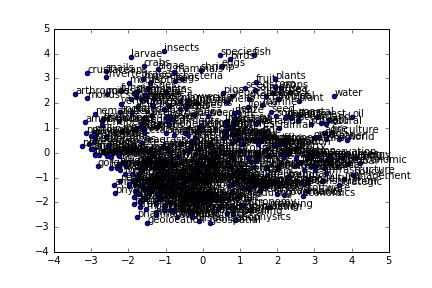

In [59]:
X = model[result_vocab]

font = matplotlib.font_manager.FontProperties(fname='./ipag.ttc')

words_np = []
#a list of labels (words)
words_label = []
for word, vector in result_vocab.items():
    words_np.append(model[word])
    words_label.append(word)
        
pca = PCA(n_components=2)
pca.fit(words_np)
reduced= pca.transform(words_np)
# plt.plot(pca.explained_variance_ratio_)
for index,vec in enumerate(reduced):
    # print ('%s %s'%(words_label[index],vec))
    x,y=vec[0],vec[1]
    plt.scatter(x,y)
    plt.annotate(words_label[index],xy=(x,y))
plt.show()

## Suggesting new keywords

We could envisage a keyword tagging interface were we suggest new keywords based on the average distance from existing keywords

In [63]:
model.similar_by_vector((model['dog'] + model['cat'])/2,topn=10)

[('dog', 0.921538770198822),
 ('cat', 0.9122815728187561),
 ('dogs', 0.7285658121109009),
 ('pet', 0.6637269258499146),
 ('cats', 0.6461218595504761),
 ('puppy', 0.5556367635726929),
 ('horse', 0.5517184138298035),
 ('animal', 0.531834065914154),
 ('pets', 0.5269761085510254),
 ('hound', 0.5094276666641235)]

In [71]:
model.similar_by_vector((model['water'] + model['runoff'])/2,topn=30)

[('runoff', 0.8186976909637451),
 ('water', 0.8018253445625305),
 ('sewage', 0.5654644966125488),
 ('run-off', 0.546949565410614),
 ('groundwater', 0.5467579960823059),
 ('polluted', 0.5163611173629761),
 ('drainage', 0.515787661075592),
 ('irrigation', 0.5122992992401123),
 ('pollution', 0.5067722797393799),
 ('seawater', 0.4968295097351074),
 ('soil', 0.4866226017475128),
 ('drinking', 0.4837367534637451),
 ('waste', 0.4792274832725525),
 ('rainwater', 0.4654936194419861),
 ('moisture', 0.4654146730899811),
 ('reservoirs', 0.46503356099128723),
 ('rain', 0.46365755796432495),
 ('potable', 0.46122878789901733),
 ('rivers', 0.4577578902244568),
 ('reservoir', 0.45721039175987244),
 ('wastewater', 0.4544180631637573),
 ('waters', 0.4541703462600708),
 ('flooding', 0.44811367988586426),
 ('clean', 0.44566574692726135),
 ('rainfall', 0.43809616565704346),
 ('contaminated', 0.4357152581214905),
 ('flow', 0.4356193542480469),
 ('drain', 0.43446698784828186),
 ('contamination', 0.43237060308

In [73]:
model.similar_by_vector((model['solar'] + model['radiation'])/2,topn=10)

[('radiation', 0.8520972728729248),
 ('solar', 0.8336105346679688),
 ('ultraviolet', 0.6234352588653564),
 ('uv', 0.5582942962646484),
 ('infrared', 0.5512473583221436),
 ('thermal', 0.5436907410621643),
 ('cosmic', 0.5349714756011963),
 ('sunlight', 0.5338567495346069),
 ('emitted', 0.5294535756111145),
 ('electromagnetic', 0.5245305299758911)]